In [69]:
import matplotlib.pyplot as plt
import numpy as np
import scienceplots
import os

from blume.model.post_props import Prop
from blume.process import plot_file, exact_m, read
from blume.run import Results, ModelParameters

plt.style.use("science")
plt.rcParams["text.usetex"] = True

T_c = 2 / np.log(1 + np.sqrt(2))

chis = [4, 8, 12, 24]

In [3]:
result = Results(varying_param= "chi", range=chis)
params = ModelParameters(T_range=(2.23, 2.29), step=0.0001, tol=1e-11, max_steps=int(10e9), use_prev=False)
result.get(params)

chi=4: 100%|██████████| 601/601 [13:59<00:00,  1.40s/it]  


Saving data in folder: '01-05 17:46'
Done 



chi=8: 100%|██████████| 601/601 [15:10<00:00,  1.52s/it]  


Saving data in folder: '01-05 17:46'
Done 



chi=12: 100%|██████████| 601/601 [22:18<00:00,  2.23s/it]  


Saving data in folder: '01-05 17:46'
Done 



In [4]:
# Make dir for saving the plots
dir = "01-05 17:46"
path_dir = f"data/{dir}/plots"
if not os.path.isdir(path_dir):
    os.mkdir(path_dir)

## Phase diagram

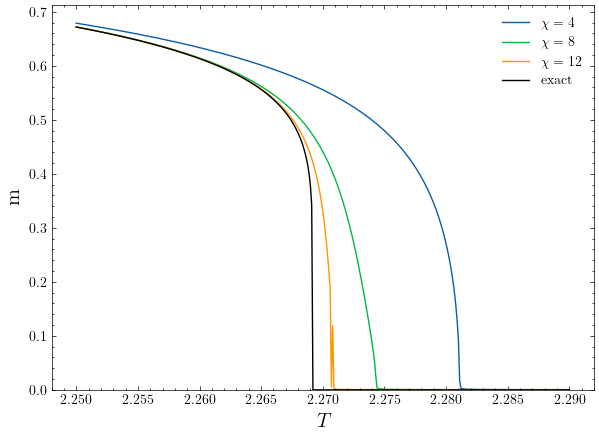

In [5]:
chis = [4, 8, 12]
plt.figure(figsize=(7, 5))
T_range = (2.25, 2.29)
for chi in chis:
    line = plot_file(fn=f"chi{chi}", range=T_range, prop=Prop.m, folder=dir)
    line.set_label(rf"$\chi = {chi}$")
T, m = exact_m(T_range)
plt.plot(T, m, "k-", label="exact")
plt.legend()
plt.xlabel(r"$T$", fontsize=15)
plt.ylabel(r"m", fontsize=15)
plt.ylim(0)
plt.savefig(f"{path_dir}/magnetizations")

## Free energy

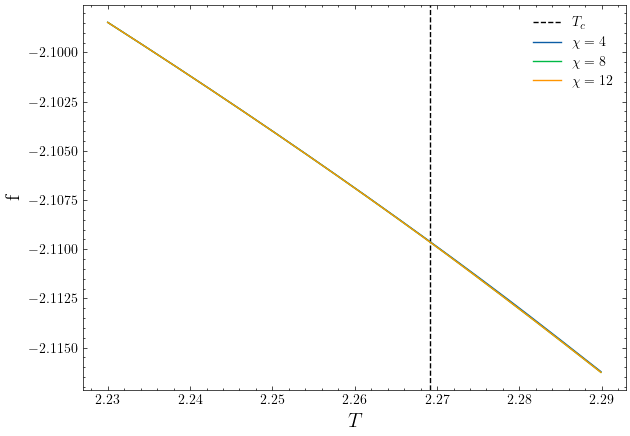

In [6]:
plt.figure(figsize=(7, 5))
T_range = (1, 4)
plt.axvline(T_c, color="k", linestyle="dashed", label=r"$T_c$")
for chi in chis:
    line = plot_file(fn=f"chi{chi}", range=T_range, prop=Prop.f, folder=dir)
    line.set_label(rf"$\chi = {chi}$")
plt.legend()
plt.xlabel(r"$T$", fontsize=15)
plt.ylabel(r"f", fontsize=15)
plt.savefig(f"{path_dir}/free energies")

## Computational cost

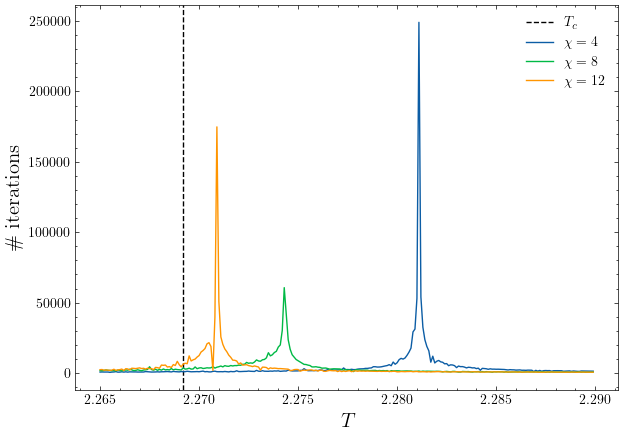

In [11]:
plt.figure(figsize=(7, 5))
T_range = (2.265, 4)
plt.axvline(T_c, color="k", linestyle="dashed", label=r"$T_c$")
for chi in chis:
    line = plot_file(fn=f"chi{chi}", range=T_range, prop="number of iterations", folder=dir)
    line.set_label(rf"$\chi = {chi}$")
plt.legend()
plt.xlabel(r"$T$", fontsize=15)
plt.ylabel(r"$\#$ iterations", fontsize=15)
plt.savefig(f"{path_dir}/execution times")

In [12]:
result = Results(varying_param= "chi", range=chis)
params = ModelParameters(T_range=(2.23, 2.29), step=0.0001, tol=1e-9, max_steps=int(10e9), use_prev=True)
result.get(params)

chi=4: 100%|██████████| 601/601 [07:51<00:00,  1.27it/s]  


Saving data in folder: '01-05 20:38'
Done 



chi=8: 100%|██████████| 601/601 [08:04<00:00,  1.24it/s]


Saving data in folder: '01-05 20:38'
Done 



chi=12: 100%|██████████| 601/601 [13:15<00:00,  1.32s/it]  


Saving data in folder: '01-05 20:38'
Done 



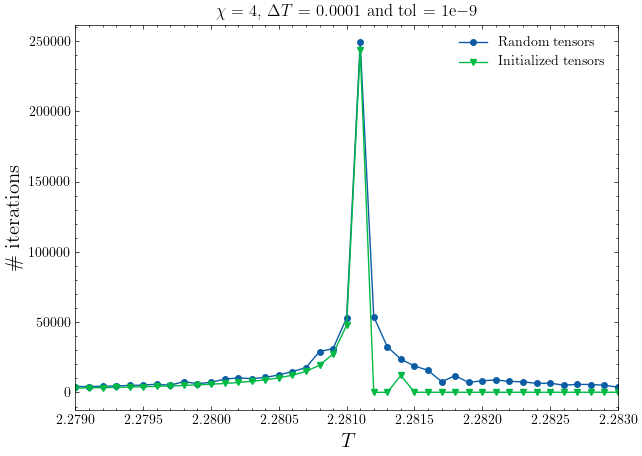

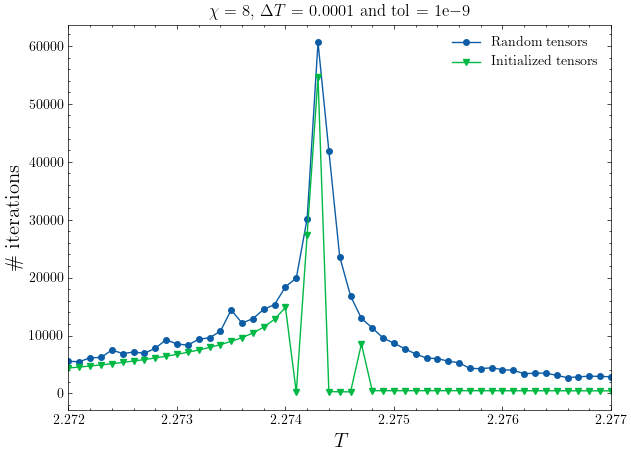

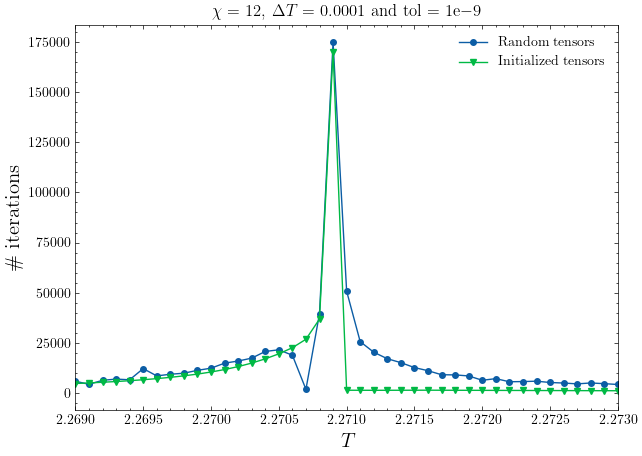

In [58]:
for chi in [4,8,12]:
    plt.figure(figsize=(7, 5))
    T_range = (2.265, 4)
    line = plot_file(fn=f"chi{chi}", range=T_range, prop="number of iterations", folder="01-05 17:46")
    line.set_label("Random tensors")
    line.set_marker("o")
    line.set_markersize(4)
    line = plot_file(fn=f"chi{chi}", range=T_range, prop="number of iterations", folder="01-05 20:38")
    line.set_label("Initialized tensors")
    line.set_marker("v")
    line.set_markersize(4)
    if chi == 12:
        plt.xlim(2.269, 2.273)
    if chi == 8:
        plt.xlim(2.272, 2.277)
    if chi == 4:
        plt.xlim(2.279, 2.283)
    plt.title(rf"$\chi$ = {chi}, $\Delta T$ = 0.0001 and tol = 1e$-$9")
    plt.legend()
    plt.xlabel(r"$T$", fontsize=15)
    plt.ylabel(r"$\#$ iterations", fontsize=15)
    plt.savefig(f"{path_dir}/execution times")

In [62]:
result = Results()
params = ModelParameters(chi = 8, T_range=(2.23, 2.29), step=0.0001, tol=1e-11, max_steps=int(10e9), use_prev=True)
result.get(params)

100%|██████████| 601/601 [13:45<00:00,  1.37s/it]  

Saving data in folder: '01-05 22:03'
Done 



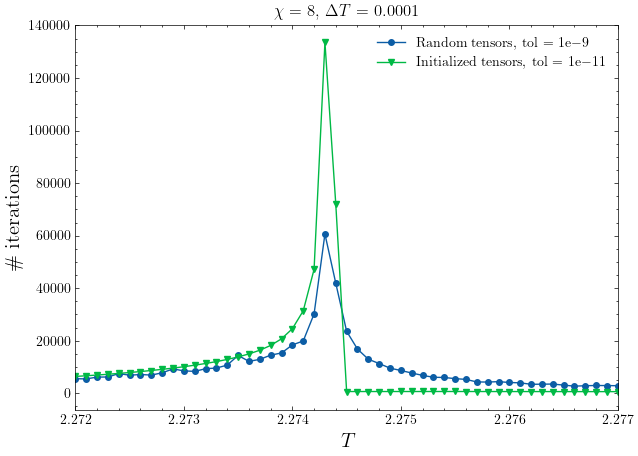

In [63]:
chi = 8
plt.figure(figsize=(7, 5))
T_range = (2.265, 4)
line = plot_file(fn=f"chi{chi}", range=T_range, prop="number of iterations", folder="01-05 17:46")
line.set_label("Random tensors, tol = 1e$-$9")
line.set_marker("o")
line.set_markersize(4)
line = plot_file(fn=f"data", range=T_range, prop="number of iterations", folder="01-05 22:03")
line.set_label("Initialized tensors, tol = 1e$-$11")
line.set_marker("v")
line.set_markersize(4)
plt.xlim(2.272, 2.277)
plt.title(rf"$\chi$ = {chi}, $\Delta T$ = 0.0001")
plt.legend()
plt.xlabel(r"$T$", fontsize=15)
plt.ylabel(r"$\#$ iterations", fontsize=15)
plt.savefig(f"{path_dir}/execution times")

In [90]:
data_init = read("01-05 22:03", "data")
data_random = read("01-05 17:46", "chi8")
total_random = sum(data_random['number of iterations'])
total_initialized = sum(data_init['number of iterations'])
print(f"total number of iterations")
print(f"initialized: {total_initialized}")
print(f"random: {total_random}")
print(f"improvement: {round((total_random - total_initialized) / total_initialized * 100, 2)}%")


total number of iterations
initialized: 992091
random: 1106487
improvement: 11.53%


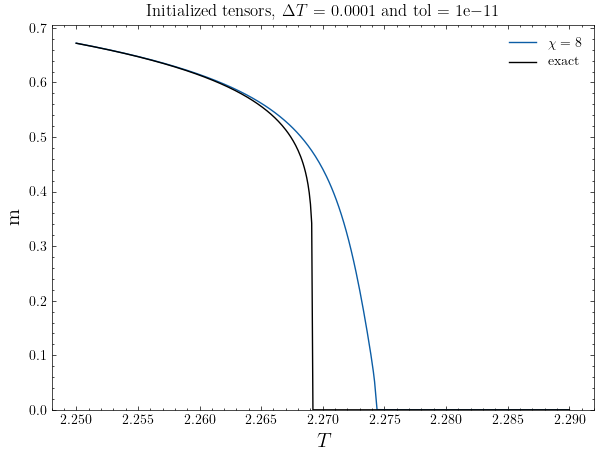

In [67]:
chis = 8
plt.figure(figsize=(7, 5))
T_range = (2.25, 2.29)
line = plot_file(fn=f"data", range=T_range, prop=Prop.m, folder="01-05 22:03")
line.set_label(rf"$\chi = {chi}$")
T, m = exact_m(T_range)
plt.plot(T, m, "k-", label="exact")
plt.legend()
plt.xlabel(r"$T$", fontsize=15)
plt.ylabel(r"m", fontsize=15)
plt.ylim(0)
plt.title(r"Initialized tensors, $\Delta T$ = 0.0001 and tol = 1e$-$11")
plt.savefig(f"{path_dir}/magnetizations")


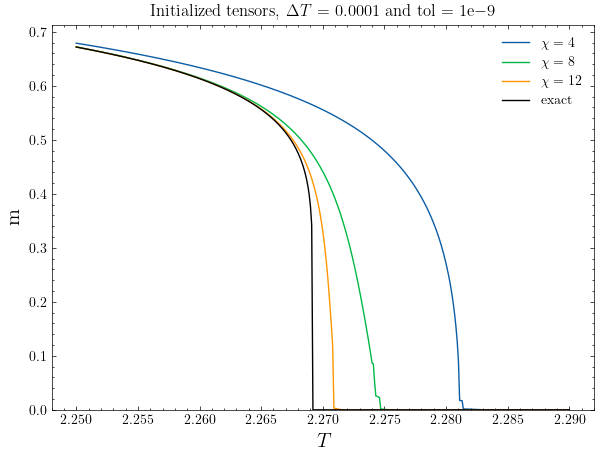

In [64]:
chis = [4, 8, 12]
plt.figure(figsize=(7, 5))
T_range = (2.25, 2.29)
for chi in chis:
    line = plot_file(fn=f"chi{chi}", range=T_range, prop=Prop.m, folder="01-05 20:38")
    line.set_label(rf"$\chi = {chi}$")
T, m = exact_m(T_range)
plt.plot(T, m, "k-", label="exact")
plt.legend()
plt.xlabel(r"$T$", fontsize=15)
plt.ylabel(r"m", fontsize=15)
plt.ylim(0)
plt.title(r"Initialized tensors, $\Delta T$ = 0.0001 and tol = 1e$-$9")
plt.savefig(f"{path_dir}/magnetizations")


## Energy per site

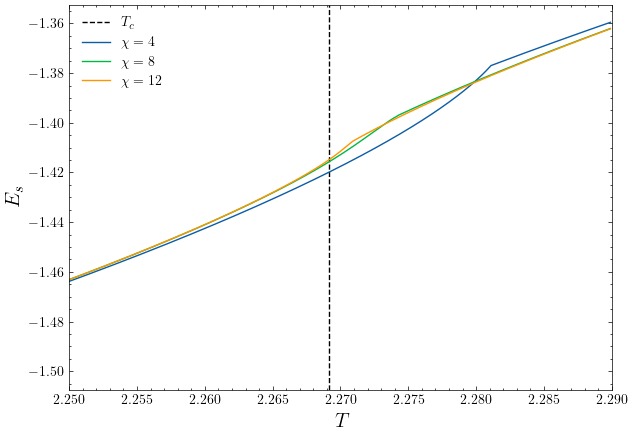

In [8]:
plt.figure(figsize=(7, 5))
plt.axvline(T_c, color="k", linestyle="dashed", label=r"$T_c$")
T_range = (2, 2.3)
for chi in chis:
    line = plot_file(fn=f"chi{chi}", range=T_range, prop=Prop.Es, folder=dir)
    line.set_label(rf"$\chi = {chi}$")
plt.legend()
plt.xlabel(r"$T$", fontsize=15)
plt.xlim(2.25, 2.29)
plt.ylabel(r"$E_s$", fontsize=15)
plt.savefig(f"{path_dir}/energies per site")

## Correlation length

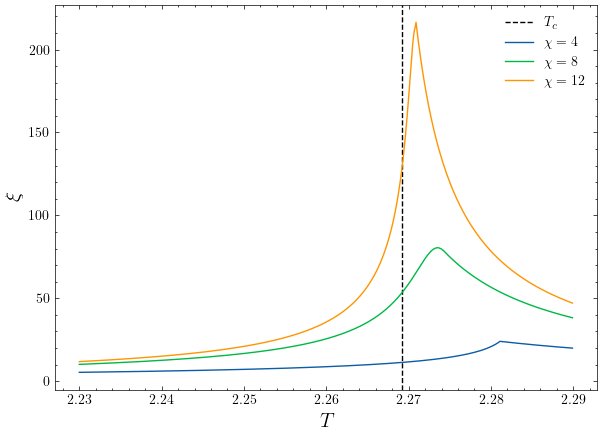

In [9]:
plt.figure(figsize=(7, 5))
plt.axvline(T_c, color="k", linestyle="dashed", label=r"$T_c$")
T_range = (2.23, 2.3)
for chi in chis:
    line = plot_file(fn=f"chi{chi}", range=T_range, prop=Prop.xi, folder=dir)
    line.set_label(rf"$\chi = {chi}$")
plt.legend()
plt.xlabel(r"$T$", fontsize=15)
plt.ylabel(r"$\xi$", fontsize=15)
plt.savefig(f"{path_dir}/correlation length")